In [1]:
"""
순환신경망:SimpleRNN, LSTM, GRU

LSTM(3, input_dim=1)   ==  LSTM(출력 개수,입력 차원)
Dese(3, input_dim=1, input_length=4)
input_length=4:시퀀스 데이터의 입력 길이
return_sequences: 시퀀스 출력 여부
-> True == many to many
-> False== many to one
stateful


"""



'\n순환신경망:SimpleRNN, LSTM, GRU\n\nLSTM(3, input_dim=1)   ==  LSTM(출력 개수,입력 차원)\nDese(3, input_dim=1, input_length=4)\ninput_length=4:시퀀스 데이터의 입력 길이\nreturn_sequences: 시퀀스 출력 여부\n-> True == many to many\n-> False== many to one\n\n\n\n'

In [ ]:
# 악보

# # 음계(데이터) -> 코드화
# # 음악은 시계열 데이터
# # 도레미파솔라시

# #알파벳:음계, 숫자:음의길이


# g8 e8 e4
# 음표:7*2 = 14가지
    
# 각 샘플은 4개 입력(음표), 클래스(음표)

# x1 x2 x3 x4      y
#  4개 입력   출력(클래스)
    


# c(도),d(레),e(미),f(파),g(솔),a(라),b(시)
# 4(4분음표), 8(8분음표)

In [2]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [3]:
import numpy as np

def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [4]:
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)

(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]


In [ ]:
*실제 음표 4개 입력 => 다음 음표 1개 출력되는 것을 반복
*처음 4개 음표 입력 -> 곡 전체를 예측


In [ ]:
*실제 음표 4개 입력 => 다음 음표 1개 출력되는 것을 반복

In [5]:
x_train = dataset[:,0:4]
y_train = dataset[:,4]
max_idx_value = 13

In [7]:
y_train

array([ 8,  1,  7,  8,  9, 10, 11, 11,  4, 11,  9,  9,  9, 10,  8,  1,  7,
        9, 11, 11,  9,  9,  2,  8,  8,  8,  8,  8,  9,  3,  9,  9,  9,  9,
        9, 10,  4, 11,  9,  2, 10,  8,  1,  7,  9, 11, 11,  9,  9,  2])

In [8]:
x_train

array([[11,  9,  2, 10],
       [ 9,  2, 10,  8],
       [ 2, 10,  8,  1],
       [10,  8,  1,  7],
       [ 8,  1,  7,  8],
       [ 1,  7,  8,  9],
       [ 7,  8,  9, 10],
       [ 8,  9, 10, 11],
       [ 9, 10, 11, 11],
       [10, 11, 11,  4],
       [11, 11,  4, 11],
       [11,  4, 11,  9],
       [ 4, 11,  9,  9],
       [11,  9,  9,  9],
       [ 9,  9,  9, 10],
       [ 9,  9, 10,  8],
       [ 9, 10,  8,  1],
       [10,  8,  1,  7],
       [ 8,  1,  7,  9],
       [ 1,  7,  9, 11],
       [ 7,  9, 11, 11],
       [ 9, 11, 11,  9],
       [11, 11,  9,  9],
       [11,  9,  9,  2],
       [ 9,  9,  2,  8],
       [ 9,  2,  8,  8],
       [ 2,  8,  8,  8],
       [ 8,  8,  8,  8],
       [ 8,  8,  8,  8],
       [ 8,  8,  8,  9],
       [ 8,  8,  9,  3],
       [ 8,  9,  3,  9],
       [ 9,  3,  9,  9],
       [ 3,  9,  9,  9],
       [ 9,  9,  9,  9],
       [ 9,  9,  9,  9],
       [ 9,  9,  9, 10],
       [ 9,  9, 10,  4],
       [ 9, 10,  4, 11],
       [10,  4, 11,  9],


In [9]:
x_train = x_train / float(max_idx_value)


In [10]:
x_train

array([[0.84615385, 0.69230769, 0.15384615, 0.76923077],
       [0.69230769, 0.15384615, 0.76923077, 0.61538462],
       [0.15384615, 0.76923077, 0.61538462, 0.07692308],
       [0.76923077, 0.61538462, 0.07692308, 0.53846154],
       [0.61538462, 0.07692308, 0.53846154, 0.61538462],
       [0.07692308, 0.53846154, 0.61538462, 0.69230769],
       [0.53846154, 0.61538462, 0.69230769, 0.76923077],
       [0.61538462, 0.69230769, 0.76923077, 0.84615385],
       [0.69230769, 0.76923077, 0.84615385, 0.84615385],
       [0.76923077, 0.84615385, 0.84615385, 0.30769231],
       [0.84615385, 0.84615385, 0.30769231, 0.84615385],
       [0.84615385, 0.30769231, 0.84615385, 0.69230769],
       [0.30769231, 0.84615385, 0.69230769, 0.69230769],
       [0.84615385, 0.69230769, 0.69230769, 0.69230769],
       [0.69230769, 0.69230769, 0.69230769, 0.76923077],
       [0.69230769, 0.69230769, 0.76923077, 0.61538462],
       [0.69230769, 0.76923077, 0.61538462, 0.07692308],
       [0.76923077, 0.61538462,

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np


In [12]:
y_train = np_utils.to_categorical(y_train)

In [13]:
y_train.shape #(50,12)

(50, 12)

In [15]:
one_hot_vec_size = y_train.shape[1] #12

In [16]:
#다층 퍼셉트론(신경망) 모델 구성
model = Sequential()
model.add(Dense(128,input_dim=4,activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [20]:
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [21]:
history = LossHistory() # 손실 이력 객체 생성
history.init()

In [22]:
model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2, callbacks=[history])


Epoch 1/2000
5/5 - 0s - loss: 2.4727 - accuracy: 0.1800
Epoch 2/2000
5/5 - 0s - loss: 2.3684 - accuracy: 0.2400
Epoch 3/2000
5/5 - 0s - loss: 2.2694 - accuracy: 0.3400
Epoch 4/2000
5/5 - 0s - loss: 2.1763 - accuracy: 0.3400
Epoch 5/2000
5/5 - 0s - loss: 2.0976 - accuracy: 0.3400
Epoch 6/2000
5/5 - 0s - loss: 2.0297 - accuracy: 0.3400
Epoch 7/2000
5/5 - 0s - loss: 1.9742 - accuracy: 0.3400
Epoch 8/2000
5/5 - 0s - loss: 1.9436 - accuracy: 0.3400
Epoch 9/2000
5/5 - 0s - loss: 1.9137 - accuracy: 0.3400
Epoch 10/2000
5/5 - 0s - loss: 1.8938 - accuracy: 0.3400
Epoch 11/2000
5/5 - 0s - loss: 1.8728 - accuracy: 0.3400
Epoch 12/2000
5/5 - 0s - loss: 1.8510 - accuracy: 0.3400
Epoch 13/2000
5/5 - 0s - loss: 1.8387 - accuracy: 0.3400
Epoch 14/2000
5/5 - 0s - loss: 1.8161 - accuracy: 0.3400
Epoch 15/2000
5/5 - 0s - loss: 1.7977 - accuracy: 0.3400
Epoch 16/2000
5/5 - 0s - loss: 1.7888 - accuracy: 0.3400
Epoch 17/2000
5/5 - 0s - loss: 1.7759 - accuracy: 0.3400
Epoch 18/2000
5/5 - 0s - loss: 1.7589 - 

Epoch 145/2000
5/5 - 0s - loss: 1.2207 - accuracy: 0.5600
Epoch 146/2000
5/5 - 0s - loss: 1.2191 - accuracy: 0.5400
Epoch 147/2000
5/5 - 0s - loss: 1.2204 - accuracy: 0.5600
Epoch 148/2000
5/5 - 0s - loss: 1.2139 - accuracy: 0.5600
Epoch 149/2000
5/5 - 0s - loss: 1.2138 - accuracy: 0.5400
Epoch 150/2000
5/5 - 0s - loss: 1.2166 - accuracy: 0.5400
Epoch 151/2000
5/5 - 0s - loss: 1.2094 - accuracy: 0.5400
Epoch 152/2000
5/5 - 0s - loss: 1.2095 - accuracy: 0.5000
Epoch 153/2000
5/5 - 0s - loss: 1.2000 - accuracy: 0.5400
Epoch 154/2000
5/5 - 0s - loss: 1.1988 - accuracy: 0.5600
Epoch 155/2000
5/5 - 0s - loss: 1.2041 - accuracy: 0.5600
Epoch 156/2000
5/5 - 0s - loss: 1.1964 - accuracy: 0.5600
Epoch 157/2000
5/5 - 0s - loss: 1.1953 - accuracy: 0.5800
Epoch 158/2000
5/5 - 0s - loss: 1.1937 - accuracy: 0.5600
Epoch 159/2000
5/5 - 0s - loss: 1.1893 - accuracy: 0.5200
Epoch 160/2000
5/5 - 0s - loss: 1.1878 - accuracy: 0.5400
Epoch 161/2000
5/5 - 0s - loss: 1.1921 - accuracy: 0.5800
Epoch 162/2000

5/5 - 0s - loss: 0.9813 - accuracy: 0.6200
Epoch 287/2000
5/5 - 0s - loss: 0.9799 - accuracy: 0.6000
Epoch 288/2000
5/5 - 0s - loss: 0.9681 - accuracy: 0.6400
Epoch 289/2000
5/5 - 0s - loss: 0.9663 - accuracy: 0.5800
Epoch 290/2000
5/5 - 0s - loss: 0.9674 - accuracy: 0.6000
Epoch 291/2000
5/5 - 0s - loss: 0.9736 - accuracy: 0.6400
Epoch 292/2000
5/5 - 0s - loss: 0.9613 - accuracy: 0.6400
Epoch 293/2000
5/5 - 0s - loss: 0.9567 - accuracy: 0.6000
Epoch 294/2000
5/5 - 0s - loss: 0.9556 - accuracy: 0.6200
Epoch 295/2000
5/5 - 0s - loss: 0.9514 - accuracy: 0.6000
Epoch 296/2000
5/5 - 0s - loss: 0.9509 - accuracy: 0.6400
Epoch 297/2000
5/5 - 0s - loss: 0.9519 - accuracy: 0.6000
Epoch 298/2000
5/5 - 0s - loss: 0.9489 - accuracy: 0.6000
Epoch 299/2000
5/5 - 0s - loss: 0.9467 - accuracy: 0.6200
Epoch 300/2000
5/5 - 0s - loss: 0.9491 - accuracy: 0.6000
Epoch 301/2000
5/5 - 0s - loss: 0.9462 - accuracy: 0.6200
Epoch 302/2000
5/5 - 0s - loss: 0.9467 - accuracy: 0.6200
Epoch 303/2000
5/5 - 0s - los

Epoch 428/2000
5/5 - 0s - loss: 0.7818 - accuracy: 0.6800
Epoch 429/2000
5/5 - 0s - loss: 0.7860 - accuracy: 0.7200
Epoch 430/2000
5/5 - 0s - loss: 0.7754 - accuracy: 0.6800
Epoch 431/2000
5/5 - 0s - loss: 0.7830 - accuracy: 0.7000
Epoch 432/2000
5/5 - 0s - loss: 0.7779 - accuracy: 0.7000
Epoch 433/2000
5/5 - 0s - loss: 0.7655 - accuracy: 0.7200
Epoch 434/2000
5/5 - 0s - loss: 0.7748 - accuracy: 0.7200
Epoch 435/2000
5/5 - 0s - loss: 0.7645 - accuracy: 0.7200
Epoch 436/2000
5/5 - 0s - loss: 0.7737 - accuracy: 0.7200
Epoch 437/2000
5/5 - 0s - loss: 0.7685 - accuracy: 0.7600
Epoch 438/2000
5/5 - 0s - loss: 0.7595 - accuracy: 0.7400
Epoch 439/2000
5/5 - 0s - loss: 0.7608 - accuracy: 0.7000
Epoch 440/2000
5/5 - 0s - loss: 0.7644 - accuracy: 0.7000
Epoch 441/2000
5/5 - 0s - loss: 0.7612 - accuracy: 0.7200
Epoch 442/2000
5/5 - 0s - loss: 0.7618 - accuracy: 0.7200
Epoch 443/2000
5/5 - 0s - loss: 0.7599 - accuracy: 0.7200
Epoch 444/2000
5/5 - 0s - loss: 0.7631 - accuracy: 0.7200
Epoch 445/2000

Epoch 570/2000
5/5 - 0s - loss: 0.6189 - accuracy: 0.7800
Epoch 571/2000
5/5 - 0s - loss: 0.6350 - accuracy: 0.7400
Epoch 572/2000
5/5 - 0s - loss: 0.6125 - accuracy: 0.8200
Epoch 573/2000
5/5 - 0s - loss: 0.6250 - accuracy: 0.7600
Epoch 574/2000
5/5 - 0s - loss: 0.6255 - accuracy: 0.7400
Epoch 575/2000
5/5 - 0s - loss: 0.6128 - accuracy: 0.7600
Epoch 576/2000
5/5 - 0s - loss: 0.6137 - accuracy: 0.7600
Epoch 577/2000
5/5 - 0s - loss: 0.6148 - accuracy: 0.7600
Epoch 578/2000
5/5 - 0s - loss: 0.6159 - accuracy: 0.7800
Epoch 579/2000
5/5 - 0s - loss: 0.6136 - accuracy: 0.7600
Epoch 580/2000
5/5 - 0s - loss: 0.6149 - accuracy: 0.7600
Epoch 581/2000
5/5 - 0s - loss: 0.6084 - accuracy: 0.7800
Epoch 582/2000
5/5 - 0s - loss: 0.6095 - accuracy: 0.7600
Epoch 583/2000
5/5 - 0s - loss: 0.6152 - accuracy: 0.7800
Epoch 584/2000
5/5 - 0s - loss: 0.6155 - accuracy: 0.8000
Epoch 585/2000
5/5 - 0s - loss: 0.6146 - accuracy: 0.7800
Epoch 586/2000
5/5 - 0s - loss: 0.6065 - accuracy: 0.7800
Epoch 587/2000

Epoch 712/2000
5/5 - 0s - loss: 0.5164 - accuracy: 0.8600
Epoch 713/2000
5/5 - 0s - loss: 0.5050 - accuracy: 0.8200
Epoch 714/2000
5/5 - 0s - loss: 0.4988 - accuracy: 0.8400
Epoch 715/2000
5/5 - 0s - loss: 0.4992 - accuracy: 0.8200
Epoch 716/2000
5/5 - 0s - loss: 0.4969 - accuracy: 0.8200
Epoch 717/2000
5/5 - 0s - loss: 0.4984 - accuracy: 0.8600
Epoch 718/2000
5/5 - 0s - loss: 0.5127 - accuracy: 0.8000
Epoch 719/2000
5/5 - 0s - loss: 0.4989 - accuracy: 0.8800
Epoch 720/2000
5/5 - 0s - loss: 0.4892 - accuracy: 0.8600
Epoch 721/2000
5/5 - 0s - loss: 0.5151 - accuracy: 0.8000
Epoch 722/2000
5/5 - 0s - loss: 0.5105 - accuracy: 0.8200
Epoch 723/2000
5/5 - 0s - loss: 0.5057 - accuracy: 0.8200
Epoch 724/2000
5/5 - 0s - loss: 0.4976 - accuracy: 0.8600
Epoch 725/2000
5/5 - 0s - loss: 0.5013 - accuracy: 0.8400
Epoch 726/2000
5/5 - 0s - loss: 0.4941 - accuracy: 0.8400
Epoch 727/2000
5/5 - 0s - loss: 0.4952 - accuracy: 0.8400
Epoch 728/2000
5/5 - 0s - loss: 0.4971 - accuracy: 0.8400
Epoch 729/2000

Epoch 854/2000
5/5 - 0s - loss: 0.4082 - accuracy: 0.8800
Epoch 855/2000
5/5 - 0s - loss: 0.4210 - accuracy: 0.8800
Epoch 856/2000
5/5 - 0s - loss: 0.4135 - accuracy: 0.8800
Epoch 857/2000
5/5 - 0s - loss: 0.4135 - accuracy: 0.8800
Epoch 858/2000
5/5 - 0s - loss: 0.4338 - accuracy: 0.8400
Epoch 859/2000
5/5 - 0s - loss: 0.4094 - accuracy: 0.9000
Epoch 860/2000
5/5 - 0s - loss: 0.4075 - accuracy: 0.9000
Epoch 861/2000
5/5 - 0s - loss: 0.4175 - accuracy: 0.8800
Epoch 862/2000
5/5 - 0s - loss: 0.4085 - accuracy: 0.8800
Epoch 863/2000
5/5 - 0s - loss: 0.4060 - accuracy: 0.9000
Epoch 864/2000
5/5 - 0s - loss: 0.4014 - accuracy: 0.9000
Epoch 865/2000
5/5 - 0s - loss: 0.4048 - accuracy: 0.9000
Epoch 866/2000
5/5 - 0s - loss: 0.4126 - accuracy: 0.9000
Epoch 867/2000
5/5 - 0s - loss: 0.4181 - accuracy: 0.9000
Epoch 868/2000
5/5 - 0s - loss: 0.4205 - accuracy: 0.8600
Epoch 869/2000
5/5 - 0s - loss: 0.4093 - accuracy: 0.8800
Epoch 870/2000
5/5 - 0s - loss: 0.4101 - accuracy: 0.9000
Epoch 871/2000

Epoch 996/2000
5/5 - 0s - loss: 0.3471 - accuracy: 0.9200
Epoch 997/2000
5/5 - 0s - loss: 0.3521 - accuracy: 0.9200
Epoch 998/2000
5/5 - 0s - loss: 0.3548 - accuracy: 0.9000
Epoch 999/2000
5/5 - 0s - loss: 0.3451 - accuracy: 0.9200
Epoch 1000/2000
5/5 - 0s - loss: 0.3491 - accuracy: 0.9200
Epoch 1001/2000
5/5 - 0s - loss: 0.3453 - accuracy: 0.9000
Epoch 1002/2000
5/5 - 0s - loss: 0.3435 - accuracy: 0.8800
Epoch 1003/2000
5/5 - 0s - loss: 0.3531 - accuracy: 0.8800
Epoch 1004/2000
5/5 - 0s - loss: 0.3448 - accuracy: 0.8800
Epoch 1005/2000
5/5 - 0s - loss: 0.3503 - accuracy: 0.9200
Epoch 1006/2000
5/5 - 0s - loss: 0.3445 - accuracy: 0.9200
Epoch 1007/2000
5/5 - 0s - loss: 0.3440 - accuracy: 0.9200
Epoch 1008/2000
5/5 - 0s - loss: 0.3494 - accuracy: 0.9200
Epoch 1009/2000
5/5 - 0s - loss: 0.3442 - accuracy: 0.9200
Epoch 1010/2000
5/5 - 0s - loss: 0.3430 - accuracy: 0.9200
Epoch 1011/2000
5/5 - 0s - loss: 0.3407 - accuracy: 0.9200
Epoch 1012/2000
5/5 - 0s - loss: 0.3416 - accuracy: 0.9200
E

Epoch 1135/2000
5/5 - 0s - loss: 0.3039 - accuracy: 0.9200
Epoch 1136/2000
5/5 - 0s - loss: 0.3032 - accuracy: 0.9200
Epoch 1137/2000
5/5 - 0s - loss: 0.3032 - accuracy: 0.9200
Epoch 1138/2000
5/5 - 0s - loss: 0.2934 - accuracy: 0.9200
Epoch 1139/2000
5/5 - 0s - loss: 0.2976 - accuracy: 0.9000
Epoch 1140/2000
5/5 - 0s - loss: 0.3017 - accuracy: 0.8800
Epoch 1141/2000
5/5 - 0s - loss: 0.2993 - accuracy: 0.9200
Epoch 1142/2000
5/5 - 0s - loss: 0.2944 - accuracy: 0.9200
Epoch 1143/2000
5/5 - 0s - loss: 0.2999 - accuracy: 0.9200
Epoch 1144/2000
5/5 - 0s - loss: 0.2951 - accuracy: 0.9000
Epoch 1145/2000
5/5 - 0s - loss: 0.2939 - accuracy: 0.9200
Epoch 1146/2000
5/5 - 0s - loss: 0.3062 - accuracy: 0.9200
Epoch 1147/2000
5/5 - 0s - loss: 0.2956 - accuracy: 0.9200
Epoch 1148/2000
5/5 - 0s - loss: 0.2972 - accuracy: 0.9000
Epoch 1149/2000
5/5 - 0s - loss: 0.2998 - accuracy: 0.9200
Epoch 1150/2000
5/5 - 0s - loss: 0.2980 - accuracy: 0.9000
Epoch 1151/2000
5/5 - 0s - loss: 0.2941 - accuracy: 0.92

Epoch 1274/2000
5/5 - 0s - loss: 0.2589 - accuracy: 0.9200
Epoch 1275/2000
5/5 - 0s - loss: 0.2568 - accuracy: 0.9200
Epoch 1276/2000
5/5 - 0s - loss: 0.2755 - accuracy: 0.9200
Epoch 1277/2000
5/5 - 0s - loss: 0.2716 - accuracy: 0.9000
Epoch 1278/2000
5/5 - 0s - loss: 0.2619 - accuracy: 0.8800
Epoch 1279/2000
5/5 - 0s - loss: 0.2642 - accuracy: 0.9200
Epoch 1280/2000
5/5 - 0s - loss: 0.2553 - accuracy: 0.9200
Epoch 1281/2000
5/5 - 0s - loss: 0.2549 - accuracy: 0.9200
Epoch 1282/2000
5/5 - 0s - loss: 0.2585 - accuracy: 0.9200
Epoch 1283/2000
5/5 - 0s - loss: 0.2510 - accuracy: 0.9200
Epoch 1284/2000
5/5 - 0s - loss: 0.2532 - accuracy: 0.9200
Epoch 1285/2000
5/5 - 0s - loss: 0.2598 - accuracy: 0.8800
Epoch 1286/2000
5/5 - 0s - loss: 0.2568 - accuracy: 0.9000
Epoch 1287/2000
5/5 - 0s - loss: 0.2632 - accuracy: 0.9200
Epoch 1288/2000
5/5 - 0s - loss: 0.2519 - accuracy: 0.9400
Epoch 1289/2000
5/5 - 0s - loss: 0.2643 - accuracy: 0.9200
Epoch 1290/2000
5/5 - 0s - loss: 0.2580 - accuracy: 0.92

Epoch 1413/2000
5/5 - 0s - loss: 0.2628 - accuracy: 0.8600
Epoch 1414/2000
5/5 - 0s - loss: 0.2416 - accuracy: 0.8800
Epoch 1415/2000
5/5 - 0s - loss: 0.2217 - accuracy: 0.9200
Epoch 1416/2000
5/5 - 0s - loss: 0.2317 - accuracy: 0.9200
Epoch 1417/2000
5/5 - 0s - loss: 0.2377 - accuracy: 0.9200
Epoch 1418/2000
5/5 - 0s - loss: 0.2360 - accuracy: 0.9000
Epoch 1419/2000
5/5 - 0s - loss: 0.2288 - accuracy: 0.9000
Epoch 1420/2000
5/5 - 0s - loss: 0.2248 - accuracy: 0.9200
Epoch 1421/2000
5/5 - 0s - loss: 0.2334 - accuracy: 0.9000
Epoch 1422/2000
5/5 - 0s - loss: 0.2307 - accuracy: 0.9200
Epoch 1423/2000
5/5 - 0s - loss: 0.2310 - accuracy: 0.9200
Epoch 1424/2000
5/5 - 0s - loss: 0.2280 - accuracy: 0.9000
Epoch 1425/2000
5/5 - 0s - loss: 0.2350 - accuracy: 0.9200
Epoch 1426/2000
5/5 - 0s - loss: 0.2208 - accuracy: 0.9200
Epoch 1427/2000
5/5 - 0s - loss: 0.2314 - accuracy: 0.9000
Epoch 1428/2000
5/5 - 0s - loss: 0.2260 - accuracy: 0.9400
Epoch 1429/2000
5/5 - 0s - loss: 0.2266 - accuracy: 0.92

Epoch 1552/2000
5/5 - 0s - loss: 0.2061 - accuracy: 0.9200
Epoch 1553/2000
5/5 - 0s - loss: 0.2019 - accuracy: 0.9200
Epoch 1554/2000
5/5 - 0s - loss: 0.2106 - accuracy: 0.9000
Epoch 1555/2000
5/5 - 0s - loss: 0.2050 - accuracy: 0.9000
Epoch 1556/2000
5/5 - 0s - loss: 0.2055 - accuracy: 0.9200
Epoch 1557/2000
5/5 - 0s - loss: 0.2061 - accuracy: 0.9200
Epoch 1558/2000
5/5 - 0s - loss: 0.2176 - accuracy: 0.9000
Epoch 1559/2000
5/5 - 0s - loss: 0.2150 - accuracy: 0.8800
Epoch 1560/2000
5/5 - 0s - loss: 0.2082 - accuracy: 0.9000
Epoch 1561/2000
5/5 - 0s - loss: 0.2105 - accuracy: 0.9200
Epoch 1562/2000
5/5 - 0s - loss: 0.1997 - accuracy: 0.9200
Epoch 1563/2000
5/5 - 0s - loss: 0.2066 - accuracy: 0.9200
Epoch 1564/2000
5/5 - 0s - loss: 0.2056 - accuracy: 0.9200
Epoch 1565/2000
5/5 - 0s - loss: 0.1994 - accuracy: 0.9200
Epoch 1566/2000
5/5 - 0s - loss: 0.2075 - accuracy: 0.9200
Epoch 1567/2000
5/5 - 0s - loss: 0.2006 - accuracy: 0.9200
Epoch 1568/2000
5/5 - 0s - loss: 0.2020 - accuracy: 0.92

Epoch 1691/2000
5/5 - 0s - loss: 0.1851 - accuracy: 0.9200
Epoch 1692/2000
5/5 - 0s - loss: 0.2043 - accuracy: 0.8400
Epoch 1693/2000
5/5 - 0s - loss: 0.1990 - accuracy: 0.9000
Epoch 1694/2000
5/5 - 0s - loss: 0.2088 - accuracy: 0.9000
Epoch 1695/2000
5/5 - 0s - loss: 0.2030 - accuracy: 0.9200
Epoch 1696/2000
5/5 - 0s - loss: 0.1909 - accuracy: 0.9200
Epoch 1697/2000
5/5 - 0s - loss: 0.1844 - accuracy: 0.9200
Epoch 1698/2000
5/5 - 0s - loss: 0.1882 - accuracy: 0.9000
Epoch 1699/2000
5/5 - 0s - loss: 0.1929 - accuracy: 0.8800
Epoch 1700/2000
5/5 - 0s - loss: 0.1958 - accuracy: 0.9200
Epoch 1701/2000
5/5 - 0s - loss: 0.2097 - accuracy: 0.9000
Epoch 1702/2000
5/5 - 0s - loss: 0.1989 - accuracy: 0.9000
Epoch 1703/2000
5/5 - 0s - loss: 0.2006 - accuracy: 0.9000
Epoch 1704/2000
5/5 - 0s - loss: 0.1947 - accuracy: 0.9000
Epoch 1705/2000
5/5 - 0s - loss: 0.1936 - accuracy: 0.8800
Epoch 1706/2000
5/5 - 0s - loss: 0.1894 - accuracy: 0.9200
Epoch 1707/2000
5/5 - 0s - loss: 0.1940 - accuracy: 0.92

Epoch 1830/2000
5/5 - 0s - loss: 0.1750 - accuracy: 0.9200
Epoch 1831/2000
5/5 - 0s - loss: 0.1819 - accuracy: 0.9200
Epoch 1832/2000
5/5 - 0s - loss: 0.1968 - accuracy: 0.9000
Epoch 1833/2000
5/5 - 0s - loss: 0.1850 - accuracy: 0.9000
Epoch 1834/2000
5/5 - 0s - loss: 0.1917 - accuracy: 0.9200
Epoch 1835/2000
5/5 - 0s - loss: 0.1772 - accuracy: 0.9200
Epoch 1836/2000
5/5 - 0s - loss: 0.1838 - accuracy: 0.9000
Epoch 1837/2000
5/5 - 0s - loss: 0.1789 - accuracy: 0.9200
Epoch 1838/2000
5/5 - 0s - loss: 0.1839 - accuracy: 0.9200
Epoch 1839/2000
5/5 - 0s - loss: 0.1832 - accuracy: 0.9200
Epoch 1840/2000
5/5 - 0s - loss: 0.1823 - accuracy: 0.9000
Epoch 1841/2000
5/5 - 0s - loss: 0.1767 - accuracy: 0.9000
Epoch 1842/2000
5/5 - 0s - loss: 0.1718 - accuracy: 0.9200
Epoch 1843/2000
5/5 - 0s - loss: 0.1849 - accuracy: 0.9200
Epoch 1844/2000
5/5 - 0s - loss: 0.1777 - accuracy: 0.9200
Epoch 1845/2000
5/5 - 0s - loss: 0.1855 - accuracy: 0.9000
Epoch 1846/2000
5/5 - 0s - loss: 0.1794 - accuracy: 0.92

Epoch 1969/2000
5/5 - 0s - loss: 0.1907 - accuracy: 0.8800
Epoch 1970/2000
5/5 - 0s - loss: 0.1650 - accuracy: 0.9200
Epoch 1971/2000
5/5 - 0s - loss: 0.1710 - accuracy: 0.9000
Epoch 1972/2000
5/5 - 0s - loss: 0.1640 - accuracy: 0.9000
Epoch 1973/2000
5/5 - 0s - loss: 0.1720 - accuracy: 0.8800
Epoch 1974/2000
5/5 - 0s - loss: 0.1599 - accuracy: 0.9000
Epoch 1975/2000
5/5 - 0s - loss: 0.1653 - accuracy: 0.9200
Epoch 1976/2000
5/5 - 0s - loss: 0.1726 - accuracy: 0.9200
Epoch 1977/2000
5/5 - 0s - loss: 0.1835 - accuracy: 0.8800
Epoch 1978/2000
5/5 - 0s - loss: 0.1662 - accuracy: 0.9000
Epoch 1979/2000
5/5 - 0s - loss: 0.1674 - accuracy: 0.9200
Epoch 1980/2000
5/5 - 0s - loss: 0.1800 - accuracy: 0.9200
Epoch 1981/2000
5/5 - 0s - loss: 0.1752 - accuracy: 0.8800
Epoch 1982/2000
5/5 - 0s - loss: 0.1832 - accuracy: 0.9000
Epoch 1983/2000
5/5 - 0s - loss: 0.1704 - accuracy: 0.9200
Epoch 1984/2000
5/5 - 0s - loss: 0.1691 - accuracy: 0.8800
Epoch 1985/2000
5/5 - 0s - loss: 0.1638 - accuracy: 0.92

In [23]:
history.losses

[2.4726717472076416,
 2.3684287071228027,
 2.269423246383667,
 2.176333427429199,
 2.097602605819702,
 2.029731273651123,
 1.9741549491882324,
 1.9435992240905762,
 1.913651704788208,
 1.893815517425537,
 1.8727688789367676,
 1.8510493040084839,
 1.8387202024459839,
 1.8161005973815918,
 1.797676682472229,
 1.7887824773788452,
 1.7759177684783936,
 1.7589279413223267,
 1.7510862350463867,
 1.7308876514434814,
 1.7210874557495117,
 1.7096285820007324,
 1.695583701133728,
 1.688463568687439,
 1.6708688735961914,
 1.661891222000122,
 1.6538523435592651,
 1.6447316408157349,
 1.6327462196350098,
 1.6229151487350464,
 1.6156730651855469,
 1.6150404214859009,
 1.6039702892303467,
 1.59124755859375,
 1.5831152200698853,
 1.5743446350097656,
 1.5689700841903687,
 1.5668123960494995,
 1.560130000114441,
 1.5553467273712158,
 1.5483282804489136,
 1.5487310886383057,
 1.5398105382919312,
 1.5388026237487793,
 1.525811791419983,
 1.5212684869766235,
 1.526328682899475,
 1.5106881856918335,
 1.5039

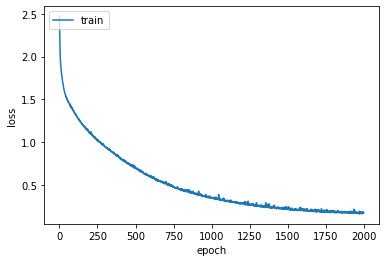

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [25]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


2/2 [==============================] - 0s 1ms/step - loss: 0.1579 - accuracy: 0.9200
accuracy: 92.00%


In [26]:
pred_count = 50

In [27]:
seq_out = ['g8', 'e8', 'e4', 'f8']

In [37]:
pred_out

array([[1.22553894e-15, 0.00000000e+00, 3.59776872e-18, 6.72920919e-08,
        1.79165408e-19, 7.33446337e-15, 8.85927768e-15, 3.35578175e-17,
        9.84966040e-01, 1.50338989e-02, 1.54843726e-19, 2.77439048e-31],
       [1.06194029e-11, 9.97526228e-01, 2.27671946e-04, 3.76584275e-09,
        8.98684793e-10, 2.80737655e-11, 2.31314655e-11, 3.34184392e-30,
        1.69329357e-03, 5.52696234e-04, 3.45072571e-09, 3.86955095e-12],
       [3.89078397e-17, 6.48273564e-18, 5.81552497e-32, 5.92093871e-31,
        7.83760446e-37, 2.80823900e-16, 2.29818271e-15, 9.99805152e-01,
        4.55856863e-09, 6.43117892e-06, 1.88418242e-04, 2.59550024e-18],
       [1.54631862e-14, 2.19266109e-30, 2.10005104e-12, 3.34728501e-13,
        1.57451367e-23, 1.10838076e-13, 2.43183891e-13, 4.51794602e-09,
        3.78779233e-01, 6.21220708e-01, 7.70928615e-21, 9.67042813e-35],
       [9.73493020e-09, 7.01683378e-10, 1.80034193e-16, 3.89653145e-08,
        3.07276669e-11, 3.61437245e-08, 3.62243320e-08, 2.49

In [32]:
pred_out = model.predict(x_train)
pred_out.shape

(50, 12)

In [33]:
#model.predict([seq_out])

In [38]:
for i in range(pred_count): #50번 반복
    idx=np.argmax(pred_out[i])
    seq_out.append(idx2code[idx])    

In [39]:
print("예측 결과(곡 전체) : ",seq_out)

예측 결과(곡 전체) :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [ ]:
#정답: ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
#        'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
#        'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
#        'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [40]:
#곡 전체를 예측
#입력 : 나 비 야 나 
#출력 : -----------> 비 야 ... 라

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in

In [42]:
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in]
#입력 코드 -> 인덱스 -> 정규화
#['g8', 'e8', 'e4', 'f8'] => [0.8461538461538461, 0.6923076923076923, 0.15384615384615385, 0.7692307692307693]

In [43]:
for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8']


In [ ]:
#정답: ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
#        'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
#        'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
#        'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [44]:
#결론 : 신경망은 시계열 데이터에 대한 예측 모델에 적합하지 않다

In [45]:
#그래서, 이번에는 lstm으로 설계

In [46]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [47]:
# 1. 데이터 준비하기
        
# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [49]:
#print(dataset.shape)


(50, 5)


In [48]:
# 2. 데이터셋 생성하기

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

(50, 5)
one hot encoding vector size is  12


In [50]:
# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, input_shape = (4, 1)))
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [51]:
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() # 손실 이력 객체 생성
history.init()

In [52]:
# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=2000, batch_size=14, verbose=2, callbacks=[history])


Epoch 1/2000
4/4 - 0s - loss: 2.4719 - accuracy: 0.1800
Epoch 2/2000
4/4 - 0s - loss: 2.4299 - accuracy: 0.2000
Epoch 3/2000
4/4 - 0s - loss: 2.3871 - accuracy: 0.3400
Epoch 4/2000
4/4 - 0s - loss: 2.3414 - accuracy: 0.3400
Epoch 5/2000
4/4 - 0s - loss: 2.2945 - accuracy: 0.3400
Epoch 6/2000
4/4 - 0s - loss: 2.2282 - accuracy: 0.3400
Epoch 7/2000
4/4 - 0s - loss: 2.1663 - accuracy: 0.3400
Epoch 8/2000
4/4 - 0s - loss: 2.0978 - accuracy: 0.3400
Epoch 9/2000
4/4 - 0s - loss: 2.0259 - accuracy: 0.3400
Epoch 10/2000
4/4 - 0s - loss: 1.9995 - accuracy: 0.3400
Epoch 11/2000
4/4 - 0s - loss: 1.9778 - accuracy: 0.3400
Epoch 12/2000
4/4 - 0s - loss: 1.9658 - accuracy: 0.3400
Epoch 13/2000
4/4 - 0s - loss: 1.9520 - accuracy: 0.3400
Epoch 14/2000
4/4 - 0s - loss: 1.9371 - accuracy: 0.3400
Epoch 15/2000
4/4 - 0s - loss: 1.9339 - accuracy: 0.3400
Epoch 16/2000
4/4 - 0s - loss: 1.9276 - accuracy: 0.3400
Epoch 17/2000
4/4 - 0s - loss: 1.9234 - accuracy: 0.3400
Epoch 18/2000
4/4 - 0s - loss: 1.9186 - 

Epoch 145/2000
4/4 - 0s - loss: 1.6450 - accuracy: 0.4000
Epoch 146/2000
4/4 - 0s - loss: 1.6409 - accuracy: 0.4000
Epoch 147/2000
4/4 - 0s - loss: 1.6459 - accuracy: 0.4400
Epoch 148/2000
4/4 - 0s - loss: 1.6343 - accuracy: 0.4200
Epoch 149/2000
4/4 - 0s - loss: 1.6300 - accuracy: 0.3800
Epoch 150/2000
4/4 - 0s - loss: 1.6310 - accuracy: 0.4400
Epoch 151/2000
4/4 - 0s - loss: 1.6403 - accuracy: 0.4400
Epoch 152/2000
4/4 - 0s - loss: 1.6239 - accuracy: 0.4400
Epoch 153/2000
4/4 - 0s - loss: 1.6265 - accuracy: 0.4400
Epoch 154/2000
4/4 - 0s - loss: 1.6209 - accuracy: 0.4200
Epoch 155/2000
4/4 - 0s - loss: 1.6252 - accuracy: 0.3800
Epoch 156/2000
4/4 - 0s - loss: 1.6085 - accuracy: 0.4400
Epoch 157/2000
4/4 - 0s - loss: 1.6167 - accuracy: 0.4400
Epoch 158/2000
4/4 - 0s - loss: 1.6009 - accuracy: 0.4400
Epoch 159/2000
4/4 - 0s - loss: 1.6036 - accuracy: 0.4200
Epoch 160/2000
4/4 - 0s - loss: 1.6096 - accuracy: 0.4400
Epoch 161/2000
4/4 - 0s - loss: 1.6006 - accuracy: 0.4400
Epoch 162/2000

Epoch 287/2000
4/4 - 0s - loss: 1.3449 - accuracy: 0.5200
Epoch 288/2000
4/4 - 0s - loss: 1.3955 - accuracy: 0.4600
Epoch 289/2000
4/4 - 0s - loss: 1.3277 - accuracy: 0.4800
Epoch 290/2000
4/4 - 0s - loss: 1.3501 - accuracy: 0.4800
Epoch 291/2000
4/4 - 0s - loss: 1.3242 - accuracy: 0.5000
Epoch 292/2000
4/4 - 0s - loss: 1.3423 - accuracy: 0.5000
Epoch 293/2000
4/4 - 0s - loss: 1.3195 - accuracy: 0.5600
Epoch 294/2000
4/4 - 0s - loss: 1.3159 - accuracy: 0.5000
Epoch 295/2000
4/4 - 0s - loss: 1.3278 - accuracy: 0.5000
Epoch 296/2000
4/4 - 0s - loss: 1.3212 - accuracy: 0.5000
Epoch 297/2000
4/4 - 0s - loss: 1.3056 - accuracy: 0.5600
Epoch 298/2000
4/4 - 0s - loss: 1.3230 - accuracy: 0.5600
Epoch 299/2000
4/4 - 0s - loss: 1.2956 - accuracy: 0.5600
Epoch 300/2000
4/4 - 0s - loss: 1.3084 - accuracy: 0.5000
Epoch 301/2000
4/4 - 0s - loss: 1.3073 - accuracy: 0.5200
Epoch 302/2000
4/4 - 0s - loss: 1.2972 - accuracy: 0.5400
Epoch 303/2000
4/4 - 0s - loss: 1.2967 - accuracy: 0.5600
Epoch 304/2000

Epoch 429/2000
4/4 - 0s - loss: 1.0870 - accuracy: 0.5800
Epoch 430/2000
4/4 - 0s - loss: 1.0649 - accuracy: 0.5800
Epoch 431/2000
4/4 - 0s - loss: 1.1095 - accuracy: 0.5400
Epoch 432/2000
4/4 - 0s - loss: 1.0694 - accuracy: 0.5600
Epoch 433/2000
4/4 - 0s - loss: 1.0680 - accuracy: 0.6000
Epoch 434/2000
4/4 - 0s - loss: 1.0712 - accuracy: 0.5800
Epoch 435/2000
4/4 - 0s - loss: 1.0834 - accuracy: 0.6000
Epoch 436/2000
4/4 - 0s - loss: 1.0652 - accuracy: 0.5600
Epoch 437/2000
4/4 - 0s - loss: 1.0703 - accuracy: 0.5600
Epoch 438/2000
4/4 - 0s - loss: 1.0633 - accuracy: 0.5600
Epoch 439/2000
4/4 - 0s - loss: 1.0673 - accuracy: 0.6000
Epoch 440/2000
4/4 - 0s - loss: 1.0493 - accuracy: 0.5800
Epoch 441/2000
4/4 - 0s - loss: 1.0508 - accuracy: 0.5600
Epoch 442/2000
4/4 - 0s - loss: 1.0495 - accuracy: 0.5800
Epoch 443/2000
4/4 - 0s - loss: 1.0536 - accuracy: 0.6000
Epoch 444/2000
4/4 - 0s - loss: 1.0483 - accuracy: 0.6000
Epoch 445/2000
4/4 - 0s - loss: 1.0564 - accuracy: 0.5600
Epoch 446/2000

Epoch 571/2000
4/4 - 0s - loss: 0.8215 - accuracy: 0.6600
Epoch 572/2000
4/4 - 0s - loss: 0.8201 - accuracy: 0.6800
Epoch 573/2000
4/4 - 0s - loss: 0.8255 - accuracy: 0.7000
Epoch 574/2000
4/4 - 0s - loss: 0.8255 - accuracy: 0.7000
Epoch 575/2000
4/4 - 0s - loss: 0.8123 - accuracy: 0.6800
Epoch 576/2000
4/4 - 0s - loss: 0.8186 - accuracy: 0.6800
Epoch 577/2000
4/4 - 0s - loss: 0.8052 - accuracy: 0.7200
Epoch 578/2000
4/4 - 0s - loss: 0.8280 - accuracy: 0.7000
Epoch 579/2000
4/4 - 0s - loss: 0.8332 - accuracy: 0.6800
Epoch 580/2000
4/4 - 0s - loss: 0.8155 - accuracy: 0.7000
Epoch 581/2000
4/4 - 0s - loss: 0.8425 - accuracy: 0.7200
Epoch 582/2000
4/4 - 0s - loss: 0.8332 - accuracy: 0.6800
Epoch 583/2000
4/4 - 0s - loss: 0.8061 - accuracy: 0.6600
Epoch 584/2000
4/4 - 0s - loss: 0.8255 - accuracy: 0.6600
Epoch 585/2000
4/4 - 0s - loss: 0.8088 - accuracy: 0.6600
Epoch 586/2000
4/4 - 0s - loss: 0.7981 - accuracy: 0.7000
Epoch 587/2000
4/4 - 0s - loss: 0.8183 - accuracy: 0.6400
Epoch 588/2000

Epoch 713/2000
4/4 - 0s - loss: 0.6544 - accuracy: 0.7800
Epoch 714/2000
4/4 - 0s - loss: 0.6240 - accuracy: 0.8000
Epoch 715/2000
4/4 - 0s - loss: 0.6437 - accuracy: 0.7800
Epoch 716/2000
4/4 - 0s - loss: 0.6356 - accuracy: 0.7600
Epoch 717/2000
4/4 - 0s - loss: 0.6298 - accuracy: 0.7800
Epoch 718/2000
4/4 - 0s - loss: 0.6294 - accuracy: 0.7400
Epoch 719/2000
4/4 - 0s - loss: 0.6335 - accuracy: 0.7600
Epoch 720/2000
4/4 - 0s - loss: 0.6558 - accuracy: 0.7200
Epoch 721/2000
4/4 - 0s - loss: 0.6110 - accuracy: 0.8000
Epoch 722/2000
4/4 - 0s - loss: 0.6464 - accuracy: 0.7800
Epoch 723/2000
4/4 - 0s - loss: 0.6449 - accuracy: 0.8400
Epoch 724/2000
4/4 - 0s - loss: 0.6191 - accuracy: 0.8400
Epoch 725/2000
4/4 - 0s - loss: 0.6631 - accuracy: 0.7400
Epoch 726/2000
4/4 - 0s - loss: 0.6163 - accuracy: 0.7800
Epoch 727/2000
4/4 - 0s - loss: 0.6410 - accuracy: 0.7800
Epoch 728/2000
4/4 - 0s - loss: 0.6108 - accuracy: 0.8200
Epoch 729/2000
4/4 - 0s - loss: 0.6228 - accuracy: 0.8200
Epoch 730/2000

Epoch 855/2000
4/4 - 0s - loss: 0.5384 - accuracy: 0.8000
Epoch 856/2000
4/4 - 0s - loss: 0.5570 - accuracy: 0.7600
Epoch 857/2000
4/4 - 0s - loss: 0.5843 - accuracy: 0.8000
Epoch 858/2000
4/4 - 0s - loss: 0.5729 - accuracy: 0.7600
Epoch 859/2000
4/4 - 0s - loss: 0.5531 - accuracy: 0.8000
Epoch 860/2000
4/4 - 0s - loss: 0.5344 - accuracy: 0.8400
Epoch 861/2000
4/4 - 0s - loss: 0.5497 - accuracy: 0.8000
Epoch 862/2000
4/4 - 0s - loss: 0.5153 - accuracy: 0.8000
Epoch 863/2000
4/4 - 0s - loss: 0.5315 - accuracy: 0.8000
Epoch 864/2000
4/4 - 0s - loss: 0.5137 - accuracy: 0.8400
Epoch 865/2000
4/4 - 0s - loss: 0.5134 - accuracy: 0.8600
Epoch 866/2000
4/4 - 0s - loss: 0.5186 - accuracy: 0.8600
Epoch 867/2000
4/4 - 0s - loss: 0.5163 - accuracy: 0.8400
Epoch 868/2000
4/4 - 0s - loss: 0.5294 - accuracy: 0.8000
Epoch 869/2000
4/4 - 0s - loss: 0.5135 - accuracy: 0.8600
Epoch 870/2000
4/4 - 0s - loss: 0.5495 - accuracy: 0.8000
Epoch 871/2000
4/4 - 0s - loss: 0.5454 - accuracy: 0.8000
Epoch 872/2000

Epoch 997/2000
4/4 - 0s - loss: 0.4886 - accuracy: 0.8200
Epoch 998/2000
4/4 - 0s - loss: 0.4732 - accuracy: 0.8400
Epoch 999/2000
4/4 - 0s - loss: 0.5007 - accuracy: 0.8000
Epoch 1000/2000
4/4 - 0s - loss: 0.4514 - accuracy: 0.8400
Epoch 1001/2000
4/4 - 0s - loss: 0.4741 - accuracy: 0.8400
Epoch 1002/2000
4/4 - 0s - loss: 0.4674 - accuracy: 0.8200
Epoch 1003/2000
4/4 - 0s - loss: 0.4661 - accuracy: 0.8600
Epoch 1004/2000
4/4 - 0s - loss: 0.4707 - accuracy: 0.8400
Epoch 1005/2000
4/4 - 0s - loss: 0.4528 - accuracy: 0.8800
Epoch 1006/2000
4/4 - 0s - loss: 0.4595 - accuracy: 0.8400
Epoch 1007/2000
4/4 - 0s - loss: 0.4571 - accuracy: 0.8600
Epoch 1008/2000
4/4 - 0s - loss: 0.4535 - accuracy: 0.8400
Epoch 1009/2000
4/4 - 0s - loss: 0.4526 - accuracy: 0.8400
Epoch 1010/2000
4/4 - 0s - loss: 0.4415 - accuracy: 0.8600
Epoch 1011/2000
4/4 - 0s - loss: 0.4639 - accuracy: 0.8200
Epoch 1012/2000
4/4 - 0s - loss: 0.4499 - accuracy: 0.8400
Epoch 1013/2000
4/4 - 0s - loss: 0.4751 - accuracy: 0.8600


Epoch 1136/2000
4/4 - 0s - loss: 0.4349 - accuracy: 0.8600
Epoch 1137/2000
4/4 - 0s - loss: 0.4064 - accuracy: 0.9000
Epoch 1138/2000
4/4 - 0s - loss: 0.4387 - accuracy: 0.8400
Epoch 1139/2000
4/4 - 0s - loss: 0.4164 - accuracy: 0.8600
Epoch 1140/2000
4/4 - 0s - loss: 0.4152 - accuracy: 0.8400
Epoch 1141/2000
4/4 - 0s - loss: 0.4109 - accuracy: 0.8400
Epoch 1142/2000
4/4 - 0s - loss: 0.3981 - accuracy: 0.8600
Epoch 1143/2000
4/4 - 0s - loss: 0.4203 - accuracy: 0.8200
Epoch 1144/2000
4/4 - 0s - loss: 0.4148 - accuracy: 0.8400
Epoch 1145/2000
4/4 - 0s - loss: 0.4253 - accuracy: 0.8200
Epoch 1146/2000
4/4 - 0s - loss: 0.4099 - accuracy: 0.8800
Epoch 1147/2000
4/4 - 0s - loss: 0.4113 - accuracy: 0.8600
Epoch 1148/2000
4/4 - 0s - loss: 0.4010 - accuracy: 0.9000
Epoch 1149/2000
4/4 - 0s - loss: 0.4467 - accuracy: 0.8000
Epoch 1150/2000
4/4 - 0s - loss: 0.4344 - accuracy: 0.8200
Epoch 1151/2000
4/4 - 0s - loss: 0.4376 - accuracy: 0.8400
Epoch 1152/2000
4/4 - 0s - loss: 0.4464 - accuracy: 0.84

Epoch 1275/2000
4/4 - 0s - loss: 0.3853 - accuracy: 0.8800
Epoch 1276/2000
4/4 - 0s - loss: 0.4131 - accuracy: 0.8600
Epoch 1277/2000
4/4 - 0s - loss: 0.4323 - accuracy: 0.8200
Epoch 1278/2000
4/4 - 0s - loss: 0.4918 - accuracy: 0.8400
Epoch 1279/2000
4/4 - 0s - loss: 0.4312 - accuracy: 0.8600
Epoch 1280/2000
4/4 - 0s - loss: 0.3988 - accuracy: 0.8600
Epoch 1281/2000
4/4 - 0s - loss: 0.4273 - accuracy: 0.8400
Epoch 1282/2000
4/4 - 0s - loss: 0.3748 - accuracy: 0.8800
Epoch 1283/2000
4/4 - 0s - loss: 0.3733 - accuracy: 0.8600
Epoch 1284/2000
4/4 - 0s - loss: 0.3848 - accuracy: 0.8400
Epoch 1285/2000
4/4 - 0s - loss: 0.3855 - accuracy: 0.8200
Epoch 1286/2000
4/4 - 0s - loss: 0.3823 - accuracy: 0.8800
Epoch 1287/2000
4/4 - 0s - loss: 0.3841 - accuracy: 0.8600
Epoch 1288/2000
4/4 - 0s - loss: 0.3934 - accuracy: 0.8800
Epoch 1289/2000
4/4 - 0s - loss: 0.3643 - accuracy: 0.8800
Epoch 1290/2000
4/4 - 0s - loss: 0.3873 - accuracy: 0.8800
Epoch 1291/2000
4/4 - 0s - loss: 0.4095 - accuracy: 0.86

Epoch 1414/2000
4/4 - 0s - loss: 0.3651 - accuracy: 0.8600
Epoch 1415/2000
4/4 - 0s - loss: 0.3657 - accuracy: 0.8800
Epoch 1416/2000
4/4 - 0s - loss: 0.3546 - accuracy: 0.8800
Epoch 1417/2000
4/4 - 0s - loss: 0.4032 - accuracy: 0.8400
Epoch 1418/2000
4/4 - 0s - loss: 0.4480 - accuracy: 0.8600
Epoch 1419/2000
4/4 - 0s - loss: 0.3840 - accuracy: 0.8600
Epoch 1420/2000
4/4 - 0s - loss: 0.4130 - accuracy: 0.8000
Epoch 1421/2000
4/4 - 0s - loss: 0.3579 - accuracy: 0.8800
Epoch 1422/2000
4/4 - 0s - loss: 0.3815 - accuracy: 0.8600
Epoch 1423/2000
4/4 - 0s - loss: 0.3495 - accuracy: 0.8600
Epoch 1424/2000
4/4 - 0s - loss: 0.3639 - accuracy: 0.8600
Epoch 1425/2000
4/4 - 0s - loss: 0.3579 - accuracy: 0.8600
Epoch 1426/2000
4/4 - 0s - loss: 0.3409 - accuracy: 0.8800
Epoch 1427/2000
4/4 - 0s - loss: 0.3620 - accuracy: 0.8600
Epoch 1428/2000
4/4 - 0s - loss: 0.3501 - accuracy: 0.8800
Epoch 1429/2000
4/4 - 0s - loss: 0.3473 - accuracy: 0.8800
Epoch 1430/2000
4/4 - 0s - loss: 0.3457 - accuracy: 0.88

Epoch 1553/2000
4/4 - 0s - loss: 0.3337 - accuracy: 0.9000
Epoch 1554/2000
4/4 - 0s - loss: 0.3215 - accuracy: 0.8800
Epoch 1555/2000
4/4 - 0s - loss: 0.3332 - accuracy: 0.8800
Epoch 1556/2000
4/4 - 0s - loss: 0.3449 - accuracy: 0.8800
Epoch 1557/2000
4/4 - 0s - loss: 0.3379 - accuracy: 0.8600
Epoch 1558/2000
4/4 - 0s - loss: 0.3302 - accuracy: 0.8600
Epoch 1559/2000
4/4 - 0s - loss: 0.3346 - accuracy: 0.8800
Epoch 1560/2000
4/4 - 0s - loss: 0.3319 - accuracy: 0.8800
Epoch 1561/2000
4/4 - 0s - loss: 0.3230 - accuracy: 0.8600
Epoch 1562/2000
4/4 - 0s - loss: 0.3229 - accuracy: 0.9000
Epoch 1563/2000
4/4 - 0s - loss: 0.3265 - accuracy: 0.8800
Epoch 1564/2000
4/4 - 0s - loss: 0.3360 - accuracy: 0.8800
Epoch 1565/2000
4/4 - 0s - loss: 0.3280 - accuracy: 0.9000
Epoch 1566/2000
4/4 - 0s - loss: 0.3268 - accuracy: 0.8800
Epoch 1567/2000
4/4 - 0s - loss: 0.3233 - accuracy: 0.8400
Epoch 1568/2000
4/4 - 0s - loss: 0.3178 - accuracy: 0.8800
Epoch 1569/2000
4/4 - 0s - loss: 0.3350 - accuracy: 0.86

Epoch 1692/2000
4/4 - 0s - loss: 0.3206 - accuracy: 0.8800
Epoch 1693/2000
4/4 - 0s - loss: 0.3150 - accuracy: 0.9000
Epoch 1694/2000
4/4 - 0s - loss: 0.3343 - accuracy: 0.8600
Epoch 1695/2000
4/4 - 0s - loss: 0.3116 - accuracy: 0.8600
Epoch 1696/2000
4/4 - 0s - loss: 0.3139 - accuracy: 0.8800
Epoch 1697/2000
4/4 - 0s - loss: 0.3170 - accuracy: 0.8600
Epoch 1698/2000
4/4 - 0s - loss: 0.3151 - accuracy: 0.8600
Epoch 1699/2000
4/4 - 0s - loss: 0.3110 - accuracy: 0.8600
Epoch 1700/2000
4/4 - 0s - loss: 0.3058 - accuracy: 0.8800
Epoch 1701/2000
4/4 - 0s - loss: 0.3142 - accuracy: 0.8800
Epoch 1702/2000
4/4 - 0s - loss: 0.3088 - accuracy: 0.8800
Epoch 1703/2000
4/4 - 0s - loss: 0.3066 - accuracy: 0.8800
Epoch 1704/2000
4/4 - 0s - loss: 0.3088 - accuracy: 0.9000
Epoch 1705/2000
4/4 - 0s - loss: 0.3176 - accuracy: 0.8800
Epoch 1706/2000
4/4 - 0s - loss: 0.3099 - accuracy: 0.8800
Epoch 1707/2000
4/4 - 0s - loss: 0.3143 - accuracy: 0.8800
Epoch 1708/2000
4/4 - 0s - loss: 0.3105 - accuracy: 0.88

Epoch 1831/2000
4/4 - 0s - loss: 0.3088 - accuracy: 0.8800
Epoch 1832/2000
4/4 - 0s - loss: 0.3127 - accuracy: 0.8400
Epoch 1833/2000
4/4 - 0s - loss: 0.2950 - accuracy: 0.8800
Epoch 1834/2000
4/4 - 0s - loss: 0.3116 - accuracy: 0.8600
Epoch 1835/2000
4/4 - 0s - loss: 0.3094 - accuracy: 0.8600
Epoch 1836/2000
4/4 - 0s - loss: 0.3165 - accuracy: 0.8800
Epoch 1837/2000
4/4 - 0s - loss: 0.3106 - accuracy: 0.8800
Epoch 1838/2000
4/4 - 0s - loss: 0.3311 - accuracy: 0.8400
Epoch 1839/2000
4/4 - 0s - loss: 0.2948 - accuracy: 0.9000
Epoch 1840/2000
4/4 - 0s - loss: 0.3074 - accuracy: 0.8800
Epoch 1841/2000
4/4 - 0s - loss: 0.2936 - accuracy: 0.8800
Epoch 1842/2000
4/4 - 0s - loss: 0.3089 - accuracy: 0.8600
Epoch 1843/2000
4/4 - 0s - loss: 0.3067 - accuracy: 0.8600
Epoch 1844/2000
4/4 - 0s - loss: 0.3076 - accuracy: 0.8800
Epoch 1845/2000
4/4 - 0s - loss: 0.2910 - accuracy: 0.9000
Epoch 1846/2000
4/4 - 0s - loss: 0.3076 - accuracy: 0.8600
Epoch 1847/2000
4/4 - 0s - loss: 0.2962 - accuracy: 0.88

Epoch 1970/2000
4/4 - 0s - loss: 0.3245 - accuracy: 0.8800
Epoch 1971/2000
4/4 - 0s - loss: 0.3036 - accuracy: 0.9000
Epoch 1972/2000
4/4 - 0s - loss: 0.2885 - accuracy: 0.8600
Epoch 1973/2000
4/4 - 0s - loss: 0.2958 - accuracy: 0.9000
Epoch 1974/2000
4/4 - 0s - loss: 0.2947 - accuracy: 0.9000
Epoch 1975/2000
4/4 - 0s - loss: 0.3046 - accuracy: 0.8600
Epoch 1976/2000
4/4 - 0s - loss: 0.2865 - accuracy: 0.8800
Epoch 1977/2000
4/4 - 0s - loss: 0.2791 - accuracy: 0.9000
Epoch 1978/2000
4/4 - 0s - loss: 0.2852 - accuracy: 0.9000
Epoch 1979/2000
4/4 - 0s - loss: 0.2920 - accuracy: 0.9000
Epoch 1980/2000
4/4 - 0s - loss: 0.2819 - accuracy: 0.9000
Epoch 1981/2000
4/4 - 0s - loss: 0.2870 - accuracy: 0.8800
Epoch 1982/2000
4/4 - 0s - loss: 0.2853 - accuracy: 0.8600
Epoch 1983/2000
4/4 - 0s - loss: 0.2898 - accuracy: 0.9000
Epoch 1984/2000
4/4 - 0s - loss: 0.2825 - accuracy: 0.8600
Epoch 1985/2000
4/4 - 0s - loss: 0.2901 - accuracy: 0.8600
Epoch 1986/2000
4/4 - 0s - loss: 0.3094 - accuracy: 0.86

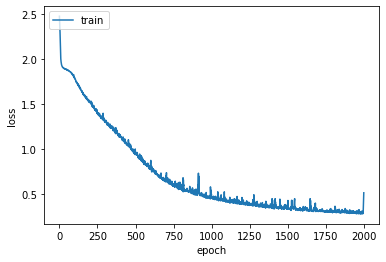

2/2 [==============================] - 0s 2ms/step - loss: 0.2986 - accuracy: 0.8600
accuracy: 86.00%


In [53]:
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

In [54]:
# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'f4', 'f4', 'f4', 'e8', 'e8', 'e8', 'e8', 'g4', 'g4', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [55]:
# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'd4', 'e8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'd4', 'e8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'f4']


In [56]:
#정답: ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
#        'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
#        'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
#        'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [57]:
#stateful=True 설정했을 때 성능이 많이 좋아짐

In [58]:
# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 1), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))
    
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
num_epochs = 2000

history = LossHistory() # 손실 이력 객체 생성

history.init()

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states() #모델에 있는 모든 상태값을 초기화

epochs : 0
50/50 - 0s - loss: 2.3695 - accuracy: 0.2800
epochs : 1
50/50 - 0s - loss: 2.0194 - accuracy: 0.3400
epochs : 2
50/50 - 0s - loss: 1.9597 - accuracy: 0.3400
epochs : 3
50/50 - 0s - loss: 1.9439 - accuracy: 0.3400
epochs : 4
50/50 - 0s - loss: 1.9339 - accuracy: 0.3400
epochs : 5
50/50 - 0s - loss: 1.9266 - accuracy: 0.3400
epochs : 6
50/50 - 0s - loss: 1.9208 - accuracy: 0.3400
epochs : 7
50/50 - 0s - loss: 1.9159 - accuracy: 0.3400
epochs : 8
50/50 - 0s - loss: 1.9115 - accuracy: 0.3600
epochs : 9
50/50 - 0s - loss: 1.9074 - accuracy: 0.3600
epochs : 10
50/50 - 0s - loss: 1.9032 - accuracy: 0.3600
epochs : 11
50/50 - 0s - loss: 1.8986 - accuracy: 0.3600
epochs : 12
50/50 - 0s - loss: 1.8934 - accuracy: 0.3600
epochs : 13
50/50 - 0s - loss: 1.8889 - accuracy: 0.3600
epochs : 14
50/50 - 0s - loss: 1.8835 - accuracy: 0.3600
epochs : 15
50/50 - 0s - loss: 1.8699 - accuracy: 0.3600
epochs : 16
50/50 - 0s - loss: 2.2874 - accuracy: 0.2800
epochs : 17
50/50 - 0s - loss: 1.8988 - a

50/50 - 0s - loss: 0.7726 - accuracy: 0.7400
epochs : 144
50/50 - 0s - loss: 0.5626 - accuracy: 0.8400
epochs : 145
50/50 - 0s - loss: 0.8884 - accuracy: 0.6600
epochs : 146
50/50 - 0s - loss: 1.3536 - accuracy: 0.4800
epochs : 147
50/50 - 0s - loss: 0.8969 - accuracy: 0.6000
epochs : 148
50/50 - 0s - loss: 0.9677 - accuracy: 0.6200
epochs : 149
50/50 - 0s - loss: 0.6027 - accuracy: 0.7600
epochs : 150
50/50 - 0s - loss: 0.5000 - accuracy: 0.8600
epochs : 151
50/50 - 0s - loss: 0.5896 - accuracy: 0.8200
epochs : 152
50/50 - 0s - loss: 0.8336 - accuracy: 0.7400
epochs : 153
50/50 - 0s - loss: 0.5844 - accuracy: 0.8000
epochs : 154
50/50 - 0s - loss: 0.6675 - accuracy: 0.7600
epochs : 155
50/50 - 0s - loss: 0.6124 - accuracy: 0.7800
epochs : 156
50/50 - 0s - loss: 1.1291 - accuracy: 0.5000
epochs : 157
50/50 - 0s - loss: 0.8294 - accuracy: 0.6800
epochs : 158
50/50 - 0s - loss: 0.5870 - accuracy: 0.8000
epochs : 159
50/50 - 0s - loss: 1.6216 - accuracy: 0.4800
epochs : 160
50/50 - 0s - l

epochs : 285
50/50 - 0s - loss: 0.2682 - accuracy: 0.9200
epochs : 286
50/50 - 0s - loss: 0.1501 - accuracy: 0.9800
epochs : 287
50/50 - 0s - loss: 0.1376 - accuracy: 0.9600
epochs : 288
50/50 - 0s - loss: 0.0996 - accuracy: 1.0000
epochs : 289
50/50 - 0s - loss: 0.1180 - accuracy: 0.9800
epochs : 290
50/50 - 0s - loss: 0.0708 - accuracy: 1.0000
epochs : 291
50/50 - 0s - loss: 0.0556 - accuracy: 1.0000
epochs : 292
50/50 - 0s - loss: 0.0492 - accuracy: 1.0000
epochs : 293
50/50 - 0s - loss: 0.0460 - accuracy: 1.0000
epochs : 294
50/50 - 0s - loss: 0.0565 - accuracy: 0.9800
epochs : 295
50/50 - 0s - loss: 0.1108 - accuracy: 0.9400
epochs : 296
50/50 - 0s - loss: 0.8608 - accuracy: 0.6600
epochs : 297
50/50 - 0s - loss: 0.3047 - accuracy: 0.9000
epochs : 298
50/50 - 0s - loss: 0.3084 - accuracy: 0.9000
epochs : 299
50/50 - 0s - loss: 0.6901 - accuracy: 0.7800
epochs : 300
50/50 - 0s - loss: 0.6171 - accuracy: 0.8200
epochs : 301
50/50 - 0s - loss: 1.4225 - accuracy: 0.5600
epochs : 302
5

epochs : 426
50/50 - 0s - loss: 8.8091e-04 - accuracy: 1.0000
epochs : 427
50/50 - 0s - loss: 8.5534e-04 - accuracy: 1.0000
epochs : 428
50/50 - 0s - loss: 8.3056e-04 - accuracy: 1.0000
epochs : 429
50/50 - 0s - loss: 8.0654e-04 - accuracy: 1.0000
epochs : 430
50/50 - 0s - loss: 7.8329e-04 - accuracy: 1.0000
epochs : 431
50/50 - 0s - loss: 7.6073e-04 - accuracy: 1.0000
epochs : 432
50/50 - 0s - loss: 7.3888e-04 - accuracy: 1.0000
epochs : 433
50/50 - 0s - loss: 7.1767e-04 - accuracy: 1.0000
epochs : 434
50/50 - 0s - loss: 6.9713e-04 - accuracy: 1.0000
epochs : 435
50/50 - 0s - loss: 6.7720e-04 - accuracy: 1.0000
epochs : 436
50/50 - 0s - loss: 6.5783e-04 - accuracy: 1.0000
epochs : 437
50/50 - 0s - loss: 6.3908e-04 - accuracy: 1.0000
epochs : 438
50/50 - 0s - loss: 6.2092e-04 - accuracy: 1.0000
epochs : 439
50/50 - 0s - loss: 6.0326e-04 - accuracy: 1.0000
epochs : 440
50/50 - 0s - loss: 5.8612e-04 - accuracy: 1.0000
epochs : 441
50/50 - 0s - loss: 5.6950e-04 - accuracy: 1.0000
epochs :

50/50 - 0s - loss: 2.1841e-05 - accuracy: 1.0000
epochs : 559
50/50 - 0s - loss: 2.1259e-05 - accuracy: 1.0000
epochs : 560
50/50 - 0s - loss: 2.0690e-05 - accuracy: 1.0000
epochs : 561
50/50 - 0s - loss: 2.0144e-05 - accuracy: 1.0000
epochs : 562
50/50 - 0s - loss: 1.9598e-05 - accuracy: 1.0000
epochs : 563
50/50 - 0s - loss: 1.9068e-05 - accuracy: 1.0000
epochs : 564
50/50 - 0s - loss: 1.8577e-05 - accuracy: 1.0000
epochs : 565
50/50 - 0s - loss: 1.8089e-05 - accuracy: 1.0000
epochs : 566
50/50 - 0s - loss: 1.7607e-05 - accuracy: 1.0000
epochs : 567
50/50 - 0s - loss: 1.7140e-05 - accuracy: 1.0000
epochs : 568
50/50 - 0s - loss: 1.6668e-05 - accuracy: 1.0000
epochs : 569
50/50 - 0s - loss: 1.6227e-05 - accuracy: 1.0000
epochs : 570
50/50 - 0s - loss: 1.5807e-05 - accuracy: 1.0000
epochs : 571
50/50 - 0s - loss: 1.5387e-05 - accuracy: 1.0000
epochs : 572
50/50 - 0s - loss: 1.4982e-05 - accuracy: 1.0000
epochs : 573
50/50 - 0s - loss: 1.4574e-05 - accuracy: 1.0000
epochs : 574
50/50 - 

epochs : 692
50/50 - 0s - loss: 0.7554 - accuracy: 0.7400
epochs : 693
50/50 - 0s - loss: 0.7849 - accuracy: 0.7000
epochs : 694
50/50 - 0s - loss: 0.6944 - accuracy: 0.7000
epochs : 695
50/50 - 0s - loss: 0.9083 - accuracy: 0.6600
epochs : 696
50/50 - 0s - loss: 0.7501 - accuracy: 0.7000
epochs : 697
50/50 - 0s - loss: 0.5221 - accuracy: 0.8400
epochs : 698
50/50 - 0s - loss: 0.5013 - accuracy: 0.8200
epochs : 699
50/50 - 0s - loss: 1.0257 - accuracy: 0.5800
epochs : 700
50/50 - 0s - loss: 0.7279 - accuracy: 0.6800
epochs : 701
50/50 - 0s - loss: 0.6690 - accuracy: 0.7800
epochs : 702
50/50 - 0s - loss: 0.4847 - accuracy: 0.7800
epochs : 703
50/50 - 0s - loss: 0.4004 - accuracy: 0.8200
epochs : 704
50/50 - 0s - loss: 0.4155 - accuracy: 0.8600
epochs : 705
50/50 - 0s - loss: 0.4926 - accuracy: 0.8200
epochs : 706
50/50 - 0s - loss: 0.6310 - accuracy: 0.8000
epochs : 707
50/50 - 0s - loss: 0.3433 - accuracy: 0.8800
epochs : 708
50/50 - 0s - loss: 0.2598 - accuracy: 0.9000
epochs : 709
5

epochs : 830
50/50 - 0s - loss: 1.7740e-04 - accuracy: 1.0000
epochs : 831
50/50 - 0s - loss: 1.7207e-04 - accuracy: 1.0000
epochs : 832
50/50 - 0s - loss: 1.6689e-04 - accuracy: 1.0000
epochs : 833
50/50 - 0s - loss: 1.6191e-04 - accuracy: 1.0000
epochs : 834
50/50 - 0s - loss: 1.5708e-04 - accuracy: 1.0000
epochs : 835
50/50 - 0s - loss: 1.5240e-04 - accuracy: 1.0000
epochs : 836
50/50 - 0s - loss: 1.4792e-04 - accuracy: 1.0000
epochs : 837
50/50 - 0s - loss: 1.4357e-04 - accuracy: 1.0000
epochs : 838
50/50 - 0s - loss: 1.3935e-04 - accuracy: 1.0000
epochs : 839
50/50 - 0s - loss: 1.3530e-04 - accuracy: 1.0000
epochs : 840
50/50 - 0s - loss: 1.3139e-04 - accuracy: 1.0000
epochs : 841
50/50 - 0s - loss: 1.2759e-04 - accuracy: 1.0000
epochs : 842
50/50 - 0s - loss: 1.2395e-04 - accuracy: 1.0000
epochs : 843
50/50 - 0s - loss: 1.2038e-04 - accuracy: 1.0000
epochs : 844
50/50 - 0s - loss: 1.1697e-04 - accuracy: 1.0000
epochs : 845
50/50 - 0s - loss: 1.1364e-04 - accuracy: 1.0000
epochs :

epochs : 963
50/50 - 0s - loss: 4.7231e-06 - accuracy: 1.0000
epochs : 964
50/50 - 0s - loss: 4.5752e-06 - accuracy: 1.0000
epochs : 965
50/50 - 0s - loss: 4.4560e-06 - accuracy: 1.0000
epochs : 966
50/50 - 0s - loss: 4.3249e-06 - accuracy: 1.0000
epochs : 967
50/50 - 0s - loss: 4.2248e-06 - accuracy: 1.0000
epochs : 968
50/50 - 0s - loss: 4.1199e-06 - accuracy: 1.0000
epochs : 969
50/50 - 0s - loss: 4.0078e-06 - accuracy: 1.0000
epochs : 970
50/50 - 0s - loss: 3.9005e-06 - accuracy: 1.0000
epochs : 971
50/50 - 0s - loss: 3.8075e-06 - accuracy: 1.0000
epochs : 972
50/50 - 0s - loss: 3.7074e-06 - accuracy: 1.0000
epochs : 973
50/50 - 0s - loss: 3.6287e-06 - accuracy: 1.0000
epochs : 974
50/50 - 0s - loss: 3.5429e-06 - accuracy: 1.0000
epochs : 975
50/50 - 0s - loss: 3.4594e-06 - accuracy: 1.0000
epochs : 976
50/50 - 0s - loss: 3.3855e-06 - accuracy: 1.0000
epochs : 977
50/50 - 0s - loss: 3.3164e-06 - accuracy: 1.0000
epochs : 978
50/50 - 0s - loss: 3.2520e-06 - accuracy: 1.0000
epochs :

50/50 - 0s - loss: 0.0050 - accuracy: 1.0000
epochs : 1102
50/50 - 0s - loss: 0.0047 - accuracy: 1.0000
epochs : 1103
50/50 - 0s - loss: 0.0045 - accuracy: 1.0000
epochs : 1104
50/50 - 0s - loss: 0.0043 - accuracy: 1.0000
epochs : 1105
50/50 - 0s - loss: 0.0041 - accuracy: 1.0000
epochs : 1106
50/50 - 0s - loss: 0.0039 - accuracy: 1.0000
epochs : 1107
50/50 - 0s - loss: 0.0036 - accuracy: 1.0000
epochs : 1108
50/50 - 0s - loss: 0.0034 - accuracy: 1.0000
epochs : 1109
50/50 - 0s - loss: 0.0033 - accuracy: 1.0000
epochs : 1110
50/50 - 0s - loss: 0.0031 - accuracy: 1.0000
epochs : 1111
50/50 - 0s - loss: 0.0029 - accuracy: 1.0000
epochs : 1112
50/50 - 0s - loss: 0.0028 - accuracy: 1.0000
epochs : 1113
50/50 - 0s - loss: 0.0026 - accuracy: 1.0000
epochs : 1114
50/50 - 0s - loss: 0.0025 - accuracy: 1.0000
epochs : 1115
50/50 - 0s - loss: 0.0024 - accuracy: 1.0000
epochs : 1116
50/50 - 0s - loss: 0.0022 - accuracy: 1.0000
epochs : 1117
50/50 - 0s - loss: 0.0021 - accuracy: 1.0000
epochs : 11

epochs : 1234
50/50 - 0s - loss: 3.4715e-05 - accuracy: 1.0000
epochs : 1235
50/50 - 0s - loss: 3.3773e-05 - accuracy: 1.0000
epochs : 1236
50/50 - 0s - loss: 3.2884e-05 - accuracy: 1.0000
epochs : 1237
50/50 - 0s - loss: 3.2023e-05 - accuracy: 1.0000
epochs : 1238
50/50 - 0s - loss: 3.1213e-05 - accuracy: 1.0000
epochs : 1239
50/50 - 0s - loss: 3.0428e-05 - accuracy: 1.0000
epochs : 1240
50/50 - 0s - loss: 2.9656e-05 - accuracy: 1.0000
epochs : 1241
50/50 - 0s - loss: 2.8924e-05 - accuracy: 1.0000
epochs : 1242
50/50 - 0s - loss: 2.8555e-05 - accuracy: 1.0000
epochs : 1243
50/50 - 0s - loss: 2.9534e-05 - accuracy: 1.0000
epochs : 1244
50/50 - 0s - loss: 6.4891e-05 - accuracy: 1.0000
epochs : 1245
50/50 - 0s - loss: 0.5578 - accuracy: 0.8800
epochs : 1246
50/50 - 0s - loss: 2.3420 - accuracy: 0.4200
epochs : 1247
50/50 - 0s - loss: 2.0561 - accuracy: 0.3200
epochs : 1248
50/50 - 0s - loss: 1.4949 - accuracy: 0.4000
epochs : 1249
50/50 - 0s - loss: 1.1950 - accuracy: 0.6000
epochs : 125

epochs : 1370
50/50 - 0s - loss: 3.1780e-04 - accuracy: 1.0000
epochs : 1371
50/50 - 0s - loss: 3.0797e-04 - accuracy: 1.0000
epochs : 1372
50/50 - 0s - loss: 2.9845e-04 - accuracy: 1.0000
epochs : 1373
50/50 - 0s - loss: 2.8919e-04 - accuracy: 1.0000
epochs : 1374
50/50 - 0s - loss: 2.8026e-04 - accuracy: 1.0000
epochs : 1375
50/50 - 0s - loss: 2.7159e-04 - accuracy: 1.0000
epochs : 1376
50/50 - 0s - loss: 2.6322e-04 - accuracy: 1.0000
epochs : 1377
50/50 - 0s - loss: 2.5509e-04 - accuracy: 1.0000
epochs : 1378
50/50 - 0s - loss: 2.4726e-04 - accuracy: 1.0000
epochs : 1379
50/50 - 0s - loss: 2.3968e-04 - accuracy: 1.0000
epochs : 1380
50/50 - 0s - loss: 2.3236e-04 - accuracy: 1.0000
epochs : 1381
50/50 - 0s - loss: 2.2528e-04 - accuracy: 1.0000
epochs : 1382
50/50 - 0s - loss: 2.1848e-04 - accuracy: 1.0000
epochs : 1383
50/50 - 0s - loss: 2.1190e-04 - accuracy: 1.0000
epochs : 1384
50/50 - 0s - loss: 2.0556e-04 - accuracy: 1.0000
epochs : 1385
50/50 - 0s - loss: 1.9943e-04 - accuracy:

50/50 - 0s - loss: 8.3374e-06 - accuracy: 1.0000
epochs : 1501
50/50 - 0s - loss: 8.1062e-06 - accuracy: 1.0000
epochs : 1502
50/50 - 0s - loss: 7.8892e-06 - accuracy: 1.0000
epochs : 1503
50/50 - 0s - loss: 7.6842e-06 - accuracy: 1.0000
epochs : 1504
50/50 - 0s - loss: 7.5006e-06 - accuracy: 1.0000
epochs : 1505
50/50 - 0s - loss: 7.3027e-06 - accuracy: 1.0000
epochs : 1506
50/50 - 0s - loss: 7.1025e-06 - accuracy: 1.0000
epochs : 1507
50/50 - 0s - loss: 6.9332e-06 - accuracy: 1.0000
epochs : 1508
50/50 - 0s - loss: 6.7591e-06 - accuracy: 1.0000
epochs : 1509
50/50 - 0s - loss: 6.5827e-06 - accuracy: 1.0000
epochs : 1510
50/50 - 0s - loss: 6.4349e-06 - accuracy: 1.0000
epochs : 1511
50/50 - 0s - loss: 6.2585e-06 - accuracy: 1.0000
epochs : 1512
50/50 - 0s - loss: 6.0820e-06 - accuracy: 1.0000
epochs : 1513
50/50 - 0s - loss: 5.9294e-06 - accuracy: 1.0000
epochs : 1514
50/50 - 0s - loss: 5.7840e-06 - accuracy: 1.0000
epochs : 1515
50/50 - 0s - loss: 5.6410e-06 - accuracy: 1.0000
epochs

epochs : 1632
50/50 - 0s - loss: 0.1026 - accuracy: 1.0000
epochs : 1633
50/50 - 0s - loss: 0.0780 - accuracy: 1.0000
epochs : 1634
50/50 - 0s - loss: 0.0739 - accuracy: 1.0000
epochs : 1635
50/50 - 0s - loss: 0.0300 - accuracy: 1.0000
epochs : 1636
50/50 - 0s - loss: 0.0225 - accuracy: 1.0000
epochs : 1637
50/50 - 0s - loss: 0.0190 - accuracy: 1.0000
epochs : 1638
50/50 - 0s - loss: 0.0167 - accuracy: 1.0000
epochs : 1639
50/50 - 0s - loss: 0.0149 - accuracy: 1.0000
epochs : 1640
50/50 - 0s - loss: 0.0134 - accuracy: 1.0000
epochs : 1641
50/50 - 0s - loss: 0.0121 - accuracy: 1.0000
epochs : 1642
50/50 - 0s - loss: 0.0110 - accuracy: 1.0000
epochs : 1643
50/50 - 0s - loss: 0.0100 - accuracy: 1.0000
epochs : 1644
50/50 - 0s - loss: 0.0092 - accuracy: 1.0000
epochs : 1645
50/50 - 0s - loss: 0.0085 - accuracy: 1.0000
epochs : 1646
50/50 - 0s - loss: 0.0078 - accuracy: 1.0000
epochs : 1647
50/50 - 0s - loss: 0.0073 - accuracy: 1.0000
epochs : 1648
50/50 - 0s - loss: 0.0068 - accuracy: 1.00

epochs : 1766
50/50 - 0s - loss: 8.6277e-05 - accuracy: 1.0000
epochs : 1767
50/50 - 0s - loss: 8.3751e-05 - accuracy: 1.0000
epochs : 1768
50/50 - 0s - loss: 8.1309e-05 - accuracy: 1.0000
epochs : 1769
50/50 - 0s - loss: 7.8964e-05 - accuracy: 1.0000
epochs : 1770
50/50 - 0s - loss: 7.6704e-05 - accuracy: 1.0000
epochs : 1771
50/50 - 0s - loss: 7.4525e-05 - accuracy: 1.0000
epochs : 1772
50/50 - 0s - loss: 7.2439e-05 - accuracy: 1.0000
epochs : 1773
50/50 - 0s - loss: 7.0451e-05 - accuracy: 1.0000
epochs : 1774
50/50 - 0s - loss: 6.8544e-05 - accuracy: 1.0000
epochs : 1775
50/50 - 0s - loss: 6.6770e-05 - accuracy: 1.0000
epochs : 1776
50/50 - 0s - loss: 6.5211e-05 - accuracy: 1.0000
epochs : 1777
50/50 - 0s - loss: 6.3840e-05 - accuracy: 1.0000
epochs : 1778
50/50 - 0s - loss: 6.2660e-05 - accuracy: 1.0000
epochs : 1779
50/50 - 0s - loss: 6.1702e-05 - accuracy: 1.0000
epochs : 1780
50/50 - 0s - loss: 6.1363e-05 - accuracy: 1.0000
epochs : 1781
50/50 - 0s - loss: 6.1814e-05 - accuracy:

epochs : 1898
50/50 - 0s - loss: 0.0300 - accuracy: 1.0000
epochs : 1899
50/50 - 0s - loss: 0.0240 - accuracy: 1.0000
epochs : 1900
50/50 - 0s - loss: 0.0201 - accuracy: 1.0000
epochs : 1901
50/50 - 0s - loss: 0.0173 - accuracy: 1.0000
epochs : 1902
50/50 - 0s - loss: 0.0150 - accuracy: 1.0000
epochs : 1903
50/50 - 0s - loss: 0.0133 - accuracy: 1.0000
epochs : 1904
50/50 - 0s - loss: 0.0118 - accuracy: 1.0000
epochs : 1905
50/50 - 0s - loss: 0.0107 - accuracy: 1.0000
epochs : 1906
50/50 - 0s - loss: 0.0096 - accuracy: 1.0000
epochs : 1907
50/50 - 0s - loss: 0.0087 - accuracy: 1.0000
epochs : 1908
50/50 - 0s - loss: 0.0079 - accuracy: 1.0000
epochs : 1909
50/50 - 0s - loss: 0.0072 - accuracy: 1.0000
epochs : 1910
50/50 - 0s - loss: 0.0065 - accuracy: 1.0000
epochs : 1911
50/50 - 0s - loss: 0.0059 - accuracy: 1.0000
epochs : 1912
50/50 - 0s - loss: 0.0054 - accuracy: 1.0000
epochs : 1913
50/50 - 0s - loss: 0.0051 - accuracy: 1.0000
epochs : 1914
50/50 - 0s - loss: 0.0049 - accuracy: 1.00

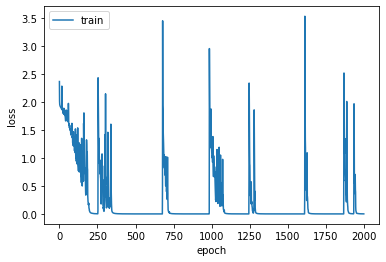

50/50 [==============================] - 0s 1ms/step - loss: 7.5340e-04 - accuracy: 1.0000
accuracy: 100.00%


In [59]:
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()

In [60]:
# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장

model.reset_states()
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [61]:
#정답: ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
#        'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
#        'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
#        'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [62]:
# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

model.reset_states()
    
print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [63]:
#정답: ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
#        'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
#        'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
#        'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']